# Summer 2024 Paris Olympics Exploration

[Data](https://www.kaggle.com/datasets/muhammadehsan02/olympic-summer-games-paris-2024?resource=download)

### Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Import Data

In [84]:
athletes_df = pd.read_csv("~/MEDS/EDS-217/eds217-project/raw_data/athletes.csv")
medallist_df = pd.read_csv("~/MEDS/EDS-217/eds217-project/raw_data/medallists.csv")

## 2. Explore Data

In [85]:
athletes_df.info
athletes_df.head()

,code,name,name_short,name_tv,gender,function,country_code,country,country_long,nationality,...,family,lang,coach,reason,hero,influence,philosophy,sporting_relatives,ritual,other_sports
0,1532872,ALEKSANYAN Artur,ALEKSANYAN A,Artur ALEKSANYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,...,"Father, Gevorg Aleksanyan","Armenian, English, Russian","Gevorg Aleksanyan (ARM), father",He followed his father and his uncle into the ...,"Footballer Zinedine Zidane (FRA), World Cup wi...","His father, Gevorg Aleksanyan","""Wrestling is my life."" (mediamax.am. 18 May 2...",NaN,NaN,NaN
1,1532873,AMOYAN Malkhas,AMOYAN M,Malkhas AMOYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,...,NaN,Armenian,NaN,NaN,NaN,NaN,"""To become a good athlete, you first have to b...","Uncle, Roman Amoyan (wrestling), 2008 Olympic ...",NaN,NaN
2,1532874,GALSTYAN Slavik,GALSTYAN S,Slavik GALSTYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,...,NaN,Armenian,Personal: Martin Alekhanyan (ARM).<br>National...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1532944,HARUTYUNYAN Arsen,HARUTYUNYAN A,Arsen HARUTYUNYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,...,"Wife, Diana (married October 2022). Daughter, ...",Armenian,National: Habetnak Kurghinyan,While doing karate he noticed wrestlers traini...,"Wrestler Armen Nazaryan (ARM, BUL), two-time O...",NaN,"“Nothing is impossible, set goals in front of ...",NaN,NaN,NaN
4,1532945,TEVANYAN Vazgen,TEVANYAN V,Vazgen TEVANYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,...,"Wife, Sona (married November 2023)","Armenian, Russian",National: Habetnak Kurghinyan (ARM),“My family did not like wrestling very much. A...,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
medallist_df.info
medallist_df.head()

,medal_date,medal_type,medal_code,name,gender,country_code,country,country_long,nationality,team,team_gender,discipline,event,event_type,url_event,birth_date,code_athlete,code_team
0,2024-07-27,Gold Medal,1.0,EVENEPOEL Remco,Male,BEL,Belgium,Belgium,Belgium,NaN,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,2000-01-25,1903136,NaN
1,2024-07-27,Silver Medal,2.0,GANNA Filippo,Male,ITA,Italy,Italy,Italy,NaN,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1996-07-25,1923520,NaN
2,2024-07-27,Bronze Medal,3.0,van AERT Wout,Male,BEL,Belgium,Belgium,Belgium,NaN,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1994-09-15,1903147,NaN
3,2024-07-27,Gold Medal,1.0,BROWN Grace,Female,AUS,Australia,Australia,Australia,NaN,NaN,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,1992-07-07,1940173,NaN
4,2024-07-27,Silver Medal,2.0,HENDERSON Anna,Female,GBR,Great Britain,Great Britain,Great Britain,NaN,NaN,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,1998-11-14,1912525,NaN


## 3. Clean Data

Formatted birthdays and formatted discipline names

In [86]:
athletes_df['birth_date'] = pd.to_datetime(athletes_df['birth_date'], format= "%Y-%m-%d")
athletes_df['disciplines'] = athletes_df['disciplines'].astype('string')

In [87]:
# Fixing formatting
athletes_df['disciplines'] = athletes_df['disciplines'].str.replace("['", " ").str.replace("']", " ").str.strip()

## 4. Filter Data

Select desired columns, filter discipline to desired sports

Select desired columns from medallist data

In [88]:
# Selecting columns
ath_filter = athletes_df[['name', 'gender', 'country', 'events', 'birth_date', 'nickname', 'hobbies', 'occupation', 'philosophy', 'disciplines']].copy()

In [7]:
# Filtering by sport
# ath_filter = ath_select[ath_select['disciplines'].isin(['Diving', 'Sailing', 'Swimming', 'Surfing', 'Water Polo', 'Shooting', 'Archcery', 'Badminton', 'Trampoline Gymnastics', 'Artistic Gymnastics', 'Sport Climbing', 'Judo', 'Weightlifting', 'Wrestling', 'Cycling Mountain Bike', 'Basketball', 'Volleyball', 'Rugby Sevens', 'Football', 'Fencing'])].copy()

In [89]:
# Select columns from medal data
med_select = medallist_df[['medal_type', 'medal_code', 'name', 'code_athlete']].copy()

## 6. Transform Data

1. Turned birthday (YYYY-MM-DD) into day of the year
2. Assigned horoscope based on day of the year
3. Assigned element based on horoscope
4. Arbitrarily assigned discipline element based on discipline
5. Checked if horoscope element matched discipline element

### 1. Birthday to Day of the Year

In [82]:
def day_of_year_func(df):
    return df.timetuple().tm_yday

In [90]:
ath_filter['day_of_year'] = ath_filter['birth_date'].apply(day_of_year_func)

### 2. Assign Horoscope Based on Day of the Year

In [158]:
# function to assign horoscope based on day of year REAL
def get_sign(df):
    if ((df >= 20) & (df <=49)):
        return 'Aquarius'
    elif ((df >= 50) & (df <=80)):
        return 'Pisces'
    elif ((df >= 81) & (df <=110)):
        return 'Aries'
    elif ((df >= 111) & (df <=140)):
        return 'Taurus'
    elif ((df >= 141) & (df <=172)):
        return 'Gemini'
    elif ((df >= 173) & (df <=204)):
        return 'Cancer'
    elif ((df >= 205) & (df <=234)):
        return 'Leo'
    elif ((df >= 235) & (df <=265)):
        return 'Virgo'
    elif ((df >= 266) & (df <=295)):
        return 'Libra'
    elif ((df >= 296) & (df <=325)):
        return 'Scorpio'
    elif ((df >= 326) & (df <=356)):
        return 'Sagittarius'
    elif ((df >= 357) | (df <= 19)):
        return 'Capricorn'

In [146]:
# applying get_sign to the data frame
ath_filter['sign'] = ath_filter['day_of_year'].apply(get_sign)

### 3. Assign Element Based on Horoscope

In [147]:
def find_element(df):
    if ((df == 'Aries') | (df == 'Leo') | (df == 'Sagittarius')):
        return("Fire")
        
    elif ((df == 'Taurus') | (df == 'Virgo') | (df == 'Capricorn')):
        return("Earth")
        
    elif ((df == 'Gemini') | (df == 'Libra') | (df == 'Aquarius')):
        return("Air")
        
    elif ((df == 'Cancer') | (df == 'Scorpio') | (df == 'Pisces')):
        return("Water")

In [148]:
# apply find_element function to data frame
ath_filter['element'] = ath_filter['sign'].apply(find_element)

### 4. Arbitrarily Assigning Sports to Elements

In [115]:
# Create function to assign element to olympic discipline
def find_element_sport(df):
    if ((df == 'Basketball') | (df == 'Volleyball') | (df == 'Rugby Sevens')| (df == 'Football') | (df == 'Fencing')):
        return("Fire")
        
    elif ((df == 'Sport Climbing') | (df == 'Judo') | (df == 'Weightlifting')| (df == 'Wrestling') | (df == 'Cycling Mountain Bike')):
        return("Earth")
        
    elif ((df == 'Shooting') | (df == 'Archery') | (df == 'Badminton')| (df == 'Trampoline') | (df == 'Artistic Gymnastics')):
        return("Air")
        
    elif ((df == 'Swimming') | (df == 'Diving') | (df == 'Sailing')| (df == 'Surfing') | (df == 'Water Polo')):
        return("Water")

In [116]:
# apply function to dataframe
ath_filter['discipline_element'] = ath_filter['disciplines'].apply(find_element_sport)

### 5. Does Horoscope Element Match Arbitrary Discipline Element?

In [125]:
def element_match_func(col1, col2):
    if col1 == col2:
        return "Yes"
    else:
        return "No"

In [149]:
ath_filter['match'] = ath_filter['element'] == ath_filter['discipline_element']

### 6. Join Filtered Athlete Data to Medallist Data

In [150]:
join_df = pd.merge(ath_filter, med_select, on='name', how='left')

In [151]:
final_df = join_df.copy()
final_df.shape

(11374, 18)

In [152]:
final_test = final_df.dropna()

## 7. Group Data

In [135]:
final_df.groupby('country').count().sort_values('name', ascending=True)

,name,gender,events,birth_date,nickname,hobbies,occupation,philosophy,disciplines,day_of_year,sign,element,discipline_element,match,medal_type,medal_code,code_athlete
country,,,,,,,,,,,,,,,,,
Nauru,1,1,1,1,1,0,1,0,1,1,1,1,0,1,0,0,0
Liechtenstein,1,1,1,1,0,1,1,0,1,1,1,1,1,1,0,0,0
Somalia,1,1,1,1,0,0,1,0,1,1,1,1,0,1,0,0,0
Belize,1,1,1,1,0,1,1,1,1,1,1,1,0,1,0,0,0
American Samoa,2,2,2,2,0,1,1,0,2,2,2,2,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Japan,443,443,443,443,96,178,375,125,443,443,443,443,267,443,83,83,83
Germany,464,464,464,464,111,188,408,106,464,464,464,464,158,464,113,113,113
Australia,503,503,503,503,221,246,433,169,503,503,503,503,213,503,123,123,123


## 8. Aggregate Data

## 9. Visualize Data

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Libra'),
  Text(1, 0, 'Virgo'),
  Text(2, 0, 'Cancer'),
  Text(3, 0, 'Capricorn'),
  Text(4, 0, 'Aries'),
  Text(5, 0, 'Aquarius'),
  Text(6, 0, 'Leo'),
  Text(7, 0, 'Gemini'),
  Text(8, 0, 'Pisces'),
  Text(9, 0, 'Taurus'),
  Text(10, 0, 'Sagittarius'),
  Text(11, 0, 'Scorpio')])

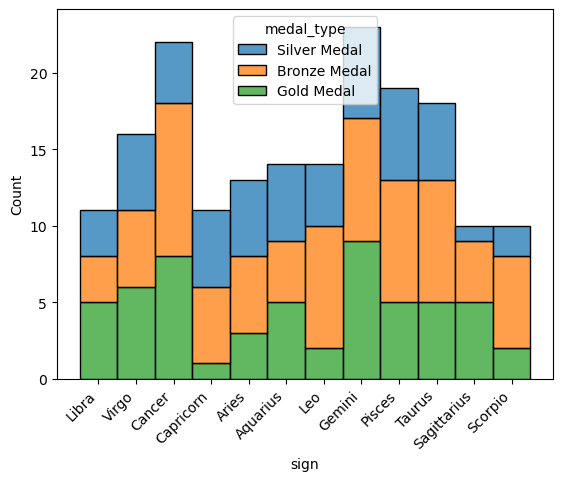

In [153]:
plt.figure()
sns.histplot(data=final_test, x='sign', hue='medal_type', multiple='stack')
plt.xticks(rotation=45, ha='right')

<Axes: xlabel='element', ylabel='Count'>

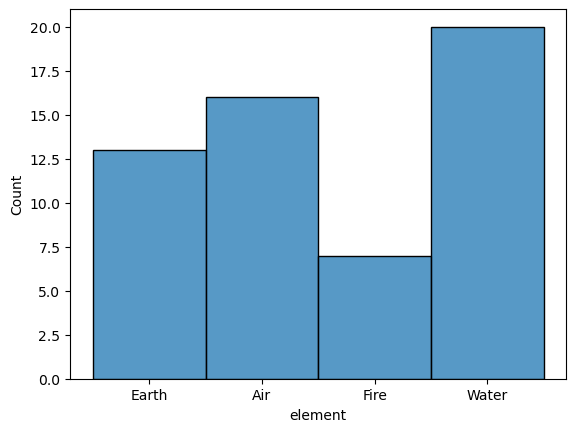

In [154]:
water_sports = final_test[final_test['discipline_element'] == 'Water']
sns.histplot(data=water_sports['element'])

## Looking for Correlation between horoscope and discipline

[]

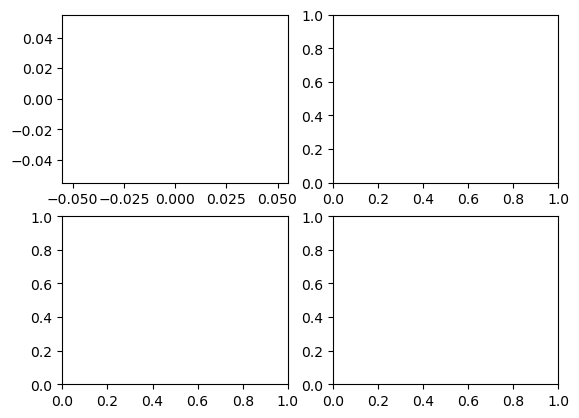

In [106]:
# Initialize empty figure
fig = plt.figure()
# Add four axes
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

# Plot data
# Plot sine wave with different colors on different axes
ax1.plot(kind='hist', data=water_sports['element'])

[]

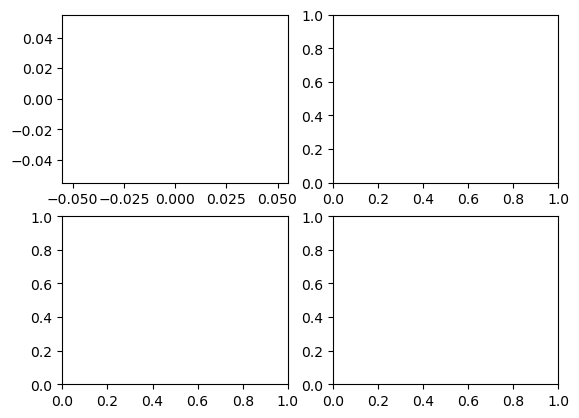

In [105]:
# plot does painting into frames (ax) tha are hanging on gallery wall (figure)

# # Set axes limits, labels, + ticks
# for i,ax in enumerate([ax1,ax2,ax3,ax4]):
#     # i is the list index, but subplots count from 1.
#     # so make a new variable to keep track of subplot number:
#     subplot_number =  i + 1 
#     # Set x limits 
#     ax.set_xlim(-5,5)
#     # Set title
#     ax.set_title(f'$\sin{{(x - {i})}}$')
#     # Only label x ticks and x-axis on bottom row
#     if subplot_number < 3:
#         ax.set_xticklabels([])
#     else:
#         ax.set_xlabel('x')
#     # Only label y ticks and y-axis on left column
#     if subplot_number == 1 or subplot_number == 3:
#         ax.set_ylabel('y')
#     else:
#         ax.set_yticklabels([])

# plt.tight_layout()

<Axes: xlabel='element', ylabel='Count'>

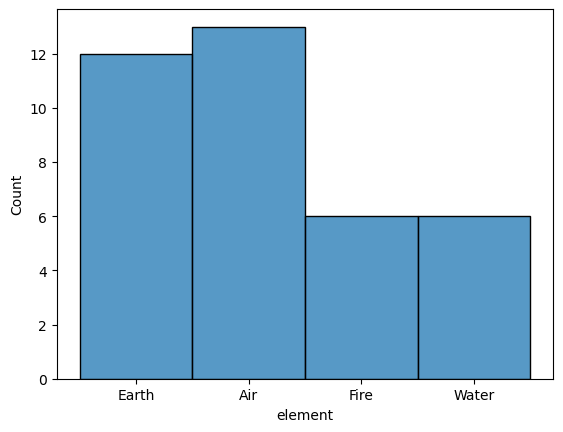

In [155]:
# Fire
fire_sports = final_test[final_test['discipline_element'] == 'Fire']
sns.histplot(fire_sports['element'])

<Axes: xlabel='element', ylabel='Count'>

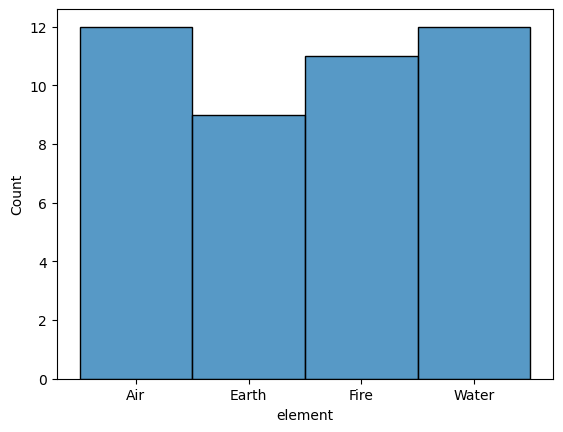

In [156]:
# Earth
earth_sports = final_test[final_test['discipline_element'] == 'Earth']
sns.histplot(earth_sports['element'])

<Axes: xlabel='element', ylabel='Count'>

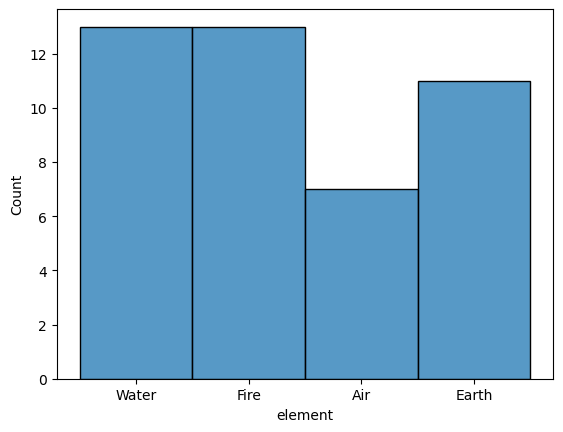

In [157]:
# Air
air_sports = final_test[final_test['discipline_element'] == 'Air']
sns.histplot(air_sports['element'])